<a href="https://colab.research.google.com/github/Raksh-iscool/Tasks/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q scikit-learn matplotlib seaborn


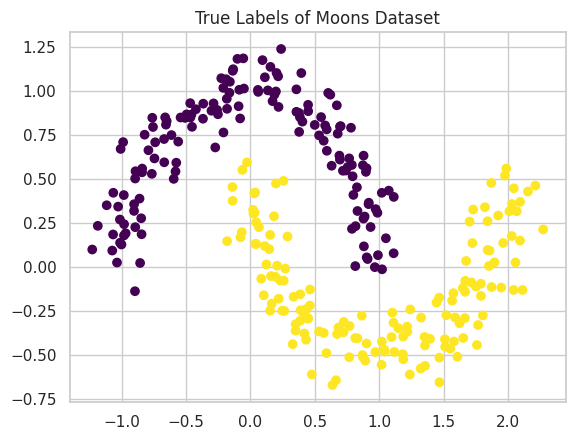

In [17]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Generate synthetic 2D moon-shaped data
X, y = make_moons(n_samples=300, noise=0.1, random_state=42)

# Visualize the true labels (not used in clustering)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("True Labels of Moons Dataset")
plt.show()


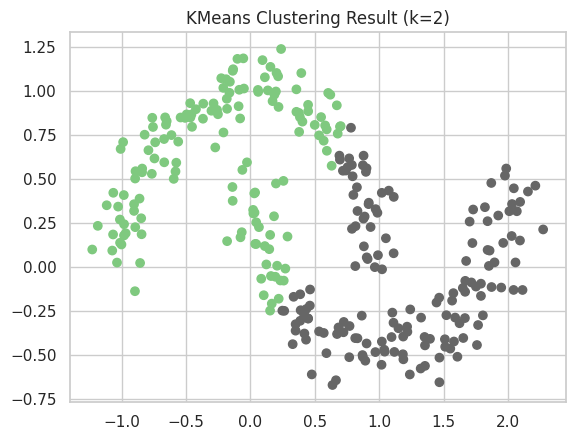

In [18]:
from sklearn.cluster import KMeans

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Visualize KMeans clusters
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='Accent')
plt.title("KMeans Clustering Result (k=2)")
plt.show()


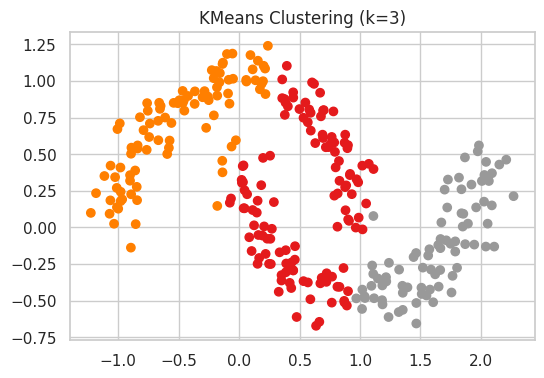

In [10]:
#chnaging k values
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(X)

# Visualize KMeans results
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='Set1')
plt.title("KMeans Clustering (k=3)")
plt.show()


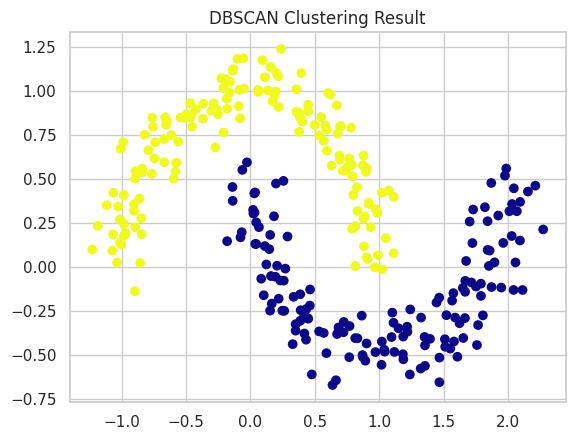

In [19]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Visualize DBSCAN clusters
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='plasma')
plt.title("DBSCAN Clustering Result")
plt.show()


In [20]:
# Unique labels in DBSCAN output (helps identify noise or all-same clusters)
print("Unique labels from DBSCAN:", set(dbscan_labels))


Unique labels from DBSCAN: {np.int64(0), np.int64(1)}


In [21]:
# Try multiple eps values and print number of clusters
for eps in [0.1, 0.15, 0.2, 0.25, 0.3]:
    db = DBSCAN(eps=eps, min_samples=5)
    labels = db.fit_predict(X)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    print(f"eps = {eps}, clusters = {n_clusters}, unique labels = {set(labels)}")


eps = 0.1, clusters = 20, unique labels = {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(-1)}
eps = 0.15, clusters = 2, unique labels = {np.int64(0), np.int64(1), np.int64(-1)}
eps = 0.2, clusters = 2, unique labels = {np.int64(0), np.int64(1)}
eps = 0.25, clusters = 1, unique labels = {np.int64(0)}
eps = 0.3, clusters = 1, unique labels = {np.int64(0)}


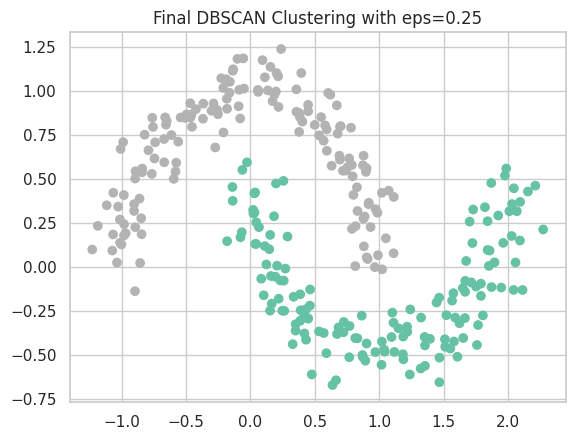

In [23]:
# Final DBSCAN visualization with good eps
best_dbscan = DBSCAN(eps=0.2, min_samples=5)
final_labels = best_dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=final_labels, cmap='Set2')
plt.title("Final DBSCAN Clustering with eps=0.25")
plt.show()


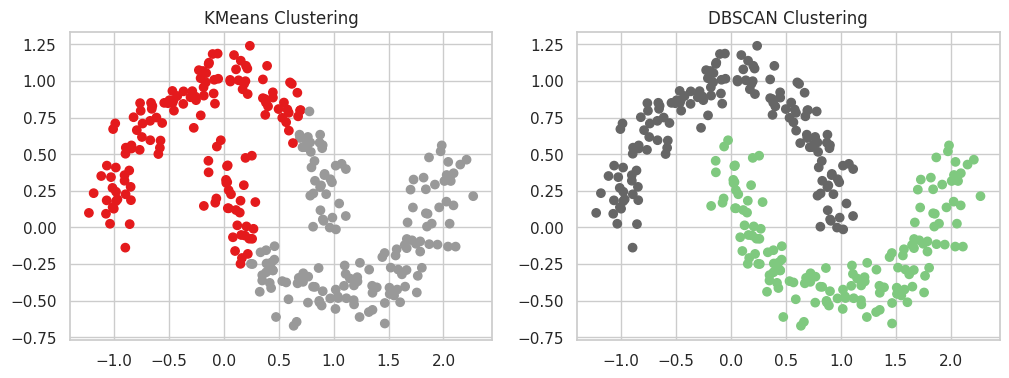

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# KMeans Plot
axs[0].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='Set1')
axs[0].set_title("KMeans Clustering")

# DBSCAN Plot
axs[1].scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='Accent')
axs[1].set_title("DBSCAN Clustering")

plt.show()

In [ ]:
# Observations (KMeans vs DBSCAN)
# KMeans:

# Assumes circular (globular) clusters.

# Fails on curved shapes like moons — cuts them wrongly.

# DBSCAN:

# No need to predefine k.

# Works well on arbitrary shapes like moons.

# Can detect and ignore noise points.